In [1]:
import seaborn as sns
import pylab
import pymoc
import xidplus
import numpy as np
%matplotlib inline
from astropy.io import fits
from astropy import wcs
from astropy.table import Table

/home/mc741/anaconda3/lib/python3.6/site-packages/mpl_toolkits/axes_grid/__init__.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  obj_type='module')


## Read tables

In [2]:
SWIRE_cat=Table.read('./data/dmu26_XID+MIPS_XMM-LSS_SWIRE_cat.fits')

In [3]:
SWIRE_cat[0:10]

help_id,RA,Dec,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24
,degrees,degrees,muJy,muJy,muJy,MJy / sr,MJy / sr,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J021748.362-055951.987,34.4515079475648,-5.997774158297615,70.693794,85.76198,56.05105,-0.008213474,5.073016e-06,nan,2000.0,0.0
HELP_J021752.307-060010.534,34.4679459475648,-6.0029261582976154,52.802345,69.704544,34.738716,-0.008213474,5.073016e-06,0.9995451,2000.0,0.0
HELP_J021751.385-055945.435,34.4641039475648,-5.995954158297614,93.22881,112.51605,74.50907,-0.008213474,5.073016e-06,0.99897915,2000.0,0.0
HELP_J021750.783-055947.249,34.46159632650286,-5.99645794184492,25.406834,43.95581,10.495363,-0.008213474,5.073016e-06,0.9989409,2000.0,0.0
HELP_J021748.345-060031.486,34.4514379475648,-6.008746158297615,18.272541,35.620014,6.020218,-0.008213474,5.073016e-06,1.0035707,1392.0,0.0
HELP_J021749.970-060043.885,34.4582099475648,-6.012190158297615,47.94679,65.271614,32.40726,-0.008213474,5.073016e-06,0.9988124,2000.0,0.0
HELP_J021751.903-060012.889,34.4662639475648,-6.0035801582976145,135.13516,156.18826,115.71621,-0.008213474,5.073016e-06,0.9995046,2000.0,0.0
HELP_J021750.428-055931.946,34.4601149475648,-5.9922071582976155,54.398857,73.35995,36.6787,-0.008213474,5.073016e-06,1.0006229,2000.0,0.0


## Look at Symmetry of PDFs to determine depth level of catalogue

6.9675155


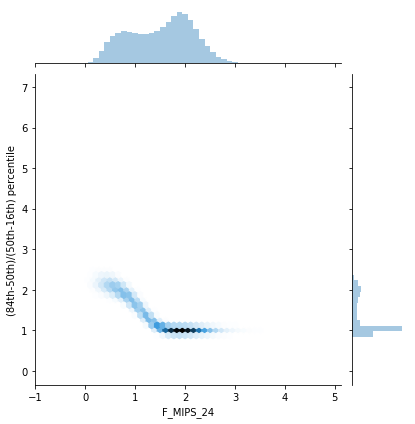

In [4]:
skew=(SWIRE_cat['FErr_MIPS_24_u']-SWIRE_cat['F_MIPS_24'])/(SWIRE_cat['F_MIPS_24']-SWIRE_cat['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 7
#g=sns.jointplot(x=np.log10(SWIRE_cat['F_MIPS_24']),y=skew, kind='hex')
#print(np.max(skew))

g=sns.jointplot(x=np.log10(SWIRE_cat['F_MIPS_24'][use]),y=skew[use], kind='hex')
print(np.max(skew[use]))



Both seem to have flux pdfs that become Gaussian at ~20$\mathrm{\mu Jy}$ 

## Add flag to catalogue

In [5]:
from astropy.table import Column
SWIRE_cat.add_column(Column(np.zeros(len(SWIRE_cat), dtype=bool),name='flag_mips_24'))


In [6]:
ind_SWIRE=(SWIRE_cat['Pval_res_24']>0.5) | (SWIRE_cat['F_MIPS_24'] < 20.0)

In [7]:
SWIRE_cat['flag_mips_24'][ind_SWIRE]=True


In [8]:
SWIRE_cat.write('./data/dmu26_XID+MIPS_XMM-LSS_SWIRE_cat_20181210.fits', format='fits',overwrite=True)